In [57]:
import math
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

In [58]:
#
# Analyzing Returns from Geometric Brownian Motion
#
# Helper Function
#   
def dN(x, mu, sigma):   
    ''' Probability density function of a normal random variable x'''
    #mu: float 
    #   expect value
    #sigma: float
    #   standard deviation
    z = (x - mu) / sigma
    pdf = np.exp(-0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf

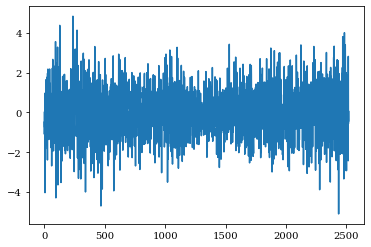

In [65]:
def simulate_gbm():
# model parameters
    S0 = 100.0 # initial index level
    T = 10.0 # time horizon
    r = 0.05 # risk-less short rate
    vol = 0.2 # instantaneous volatility
    # simulation parameters
    np.random.seed(250000) #using a seed so I can get the same simulation
    M = 252 * 10 # time steps
    I = 1 # index level paths
    dt = 1 / 252. # fixed for simplicity
    df = math.exp(-r * dt) # discount factor
    # stock price paths
    rand = np.random.standard_normal((M, I)) # random numbers
    S = np.zeros_like(rand) # stock matrix
    S[0] = S0 # initial values
    V = np.zeros_like(rand)
    V[0] = 0
    for t in range(1, M): # stock price paths
        #discrete verions given the the difference equation for times t
        S[t] = S[t - 1] * np.exp((r - vol ** 2 / 2) * dt + vol * rand[t] * math.sqrt(dt))
        gbm = pd.DataFrame()
        V[t] = S[t] - S[t-1]
    
    plt.plot(S)
    plt.show()
    plt.plot(V)
    plt.show()

simulate_gbm()


In [51]:
# Return Sample Statistics and Normality Tests
def print_statistics(data):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily Log Returns %9.6f" % np.mean(data['returns']))
    print("Std of Daily Log Returns %9.6f" % np.std(data['returns']))
    print("Mean of Annua. Log Returns %9.6f" % (np.mean(data['returns']) * 252))
    print("Std of Annua. Log Returns %9.6f" %  (np.std(data['returns']) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(data['returns']))
    print("---------------------------------------------")

In [52]:
#
# Graphical Output
#
# daily quotes and log returns
def quotes_returns(data):
    ''' Plots quotes and returns. '''
    plt.figure(figsize=(9, 6))
    plt.subplot(211)
    data['index'].plot()
    plt.ylabel('daily quotes')
    plt.grid(True)
    plt.axis('tight')
    plt.subplot(212)
    data['returns'].plot()
    plt.ylabel('daily log returns')
    plt.grid(True)
    plt.axis('tight')
    
# histogram of annualized daily log returns
def return_histogram(data):
    ''' Plots a histogram of the returns. '''
    plt.figure(figsize=(9, 5))
    x = np.linspace(min(data['returns']), max(data['returns']), 100)
    plt.hist(np.array(data['returns']), bins=50, normed=True)
    y = dN(x, np.mean(data['returns']), np.std(data['returns']))
    plt.plot(x, y, linewidth=2)
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    lt.grid(True)

# Q-Q plot of annualized daily log returns
def return_qqplot(data):
    ''' Generates a Q-Q plot of the returns.'''
    plt.figure(figsize=(9, 5))
    sm.qqplot(data['returns'], line='s')
    plt.grid(True)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')


In [53]:
# realized volatility
def realized_volatility(data):
    ''' Plots the realized volatility. '''
    plt.figure(figsize=(9, 5))
    data['rea_vol'].plot()
    plt.ylabel('realized volatility')
    plt.grid(True)


# mean return, volatility and correlation (252 days moving = 1 year)
def rolling_statistics(data):
    ''' Calculates and plots rolling statistics (mean, std, correlation). '''
    plt.figure(figsize=(11, 8))
    plt.subplot(311)
    mr = pd.rolling_mean(data['returns'], 252) * 252
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)
    plt.subplot(312)
    vo = pd.rolling_std(data['returns'], 252) * math.sqrt(252)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (252d)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()
    plt.subplot(313)
    co = pd.rolling_corr(mr, vo, 252)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation (252d)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)

In [54]:
import pandas.io.data as web
from GBM_returns import *
# Read Data for DAX from the Web
def read_dax_data():
    ''' Reads historical DAX data from Yahoo! Finance, calculates log returns,
    realized variance and volatility.'''
    DAX = web.DataReader('ˆGDAXI', data_source='yahoo',
    start='30-09-2004', end='30-09-2014')
    DAX.rename(columns={'Adj Close' : 'index'}, inplace=True)
    DAX['returns'] = np.log(DAX['index'] / DAX['index'].shift(1))
    DAX['rea_var'] = 252 * np.cumsum(DAX['returns'] ** 2) / np.arange(len(DAX))
    DAX['rea_vol'] = np.sqrt(DAX['rea_var'])
    DAX = DAX.dropna()
    return DAX

def count_jumps(data, value):
    ''' Counts the number of return jumps as defined in size by value. '''
    jumps = np.sum(np.abs(data['returns']) > value)
    return jumps

ModuleNotFoundError: No module named 'pandas.io.data'